# Flights

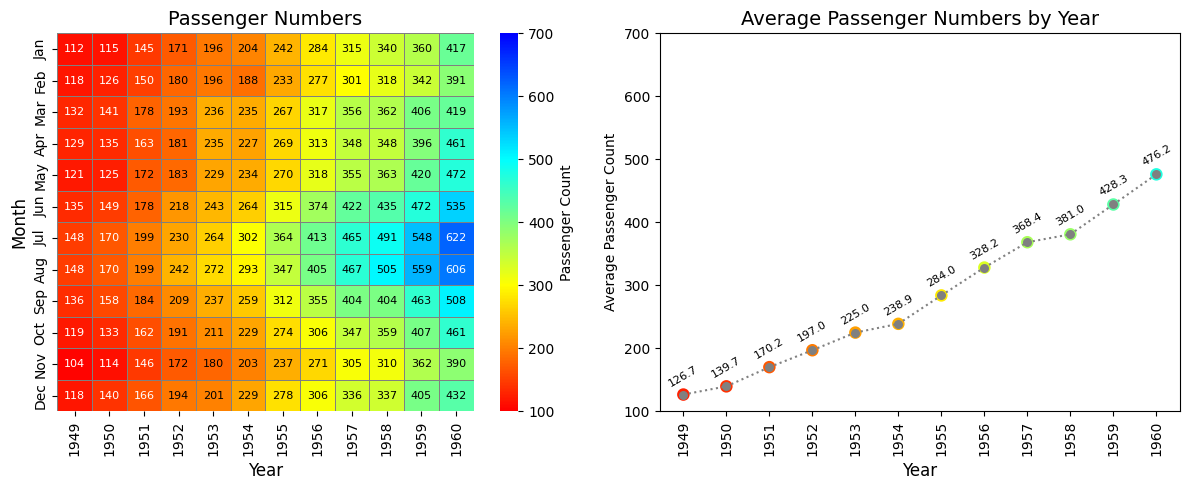

In [2]:
import seaborn as sns  # Импорт библиотеки seaborn для визуализации данных
import numpy as np  # Импорт библиотеки numpy для работы с массивами данных
import pandas as pd
import matplotlib.pyplot as plt  # Импорт модуля pyplot из библиотеки matplotlib для создания графиков
import matplotlib.colors as mcolors  # Импорт модуля colors из библиотеки matplotlib для работы с цветами

from matplotlib.colors import LinearSegmentedColormap  # Импорт класса LinearSegmentedColormap из модуля colors для создания пользовательской цветовой карты


class FlightsVisualizer:

    def __init__(self, data):
        self.data = data  # Инициализация атрибута data, содержащего данные
        self.colors = ['#FF0000', '#FFFF00', '#00FFFF', '#0000FF']  # Определение списка цветов
        self.values = self.get_color_values()  # Инициализация атрибута values с использованием метода get_color_values()
        self.normalized_values = (
            (self.values - self.values[0]) / (self.values[-1] - self.values[0])
        )  # Нормализация значений цветов
        self.cmap = LinearSegmentedColormap.from_list(
            'custom_cmap',
            list(zip(self.normalized_values, self.colors))
        )  # Создание пользовательской цветовой карты

    def get_color_values(self):
        min_val = self.data.min().min()  # Нахождение минимального значения в данных
        max_val = self.data.max().max()  # Нахождение максимального значения в данных
        order_of_magnitude = 10 ** int(np.log10(min_val))  # Определение порядка величины
        return np.linspace(
            np.floor(min_val / order_of_magnitude) * order_of_magnitude,
            np.ceil(max_val / order_of_magnitude) * order_of_magnitude,
            len(self.colors)
            ).astype(self.data.iloc[0, 0].dtype)  # Создание массива значений для цветов

    def plot_heatmap(self, ax):
        sns.heatmap(
            self.data,
            cmap=self.cmap,
            annot=False,
            fmt='d',
            linewidths=0.5,
            linecolor='gray',
            cbar_kws={'label': 'Passenger Count'},
            vmin=self.values[0],
            vmax=self.values[-1],
            ax=ax
        )  # Построение тепловой карты с использованием seaborn
        ax.set_title('Passenger Numbers', fontsize=14)  # Заголовок графика
        ax.set_xlabel(self.data.columns.name.capitalize(), fontsize=12)  # Название оси x
        ax.set_ylabel(self.data.index.name.capitalize(), fontsize=12)  # Название оси y
        ax.tick_params(axis='both', labelsize=10)  # Настройка параметров меток на осях
        for i in range(len(self.data.index)):
            for j in range(len(self.data.columns)):
                color = self.cmap(
                    (self.data.iloc[i, j] - self.values[0])
                    / (self.values[-1] - self.values[0])
                    )
                if color[0] * 0.299 + color[1] * 0.587 + color[2] * 0.114 > 0.5:
                    text_color = 'black'
                else:
                    text_color = 'white'
                ax.text(
                    j + 0.5, i + 0.5, int(self.data.iloc[i, j]),
                    ha='center',
                    va='center',
                    fontsize=8,
                    color=text_color
                )  # Добавление текста к ячейкам тепловой карты

    def plot_average_values(self, ax):
        average_values_by_column = self.data.mean(axis=0)  # Вычисление средних значений по столбцам
        columns = average_values_by_column.index  # Получение индексов столбцов
        mean_colors = [
            mcolors.to_rgba(
                self.cmap(
                    (value - self.values[0])
                    / (self.values[-1] - self.values[0])
                    )
                )
            for value in average_values_by_column
            ]  # Преобразование средних значений в цвета
        scatter = ax.scatter(
            columns,
            average_values_by_column,
            c='gray',
            marker='o',
            edgecolors=mean_colors,
            linewidths=3
            )  # Построение точечного графика средних значений
        ax.scatter(
            columns,
            average_values_by_column,
            c='gray',
            marker='o', s=30)
        for i, (column, value) in enumerate(
            zip(columns, average_values_by_column)
            ):
            ax.text(
                column,
                value + 10,
                f'{round(value, self.find_decimals())}',
                ha='center',
                va='bottom',
                fontsize=8,
                rotation=30,
                color='black'
                )  # Добавление текстовых подписей к точкам на графике
            if i > 0 and value != average_values_by_column.iloc[i - 1]:
                ax.plot(
                    [columns[i - 1], column],
                     [average_values_by_column.iloc[i - 1], value],
                    color='gray',
                    linestyle=':'
                    )  # Построение линий между точками
        ax.set_title(
            f'Average Passenger Numbers by {self.data.columns.name.capitalize()}',
            fontsize=14
            )  # Заголовок графика
        ax.set_xlabel(self.data.columns.name.capitalize(), fontsize=12)  # Название оси x
        ax.set_ylabel('Average Passenger Count', fontsize=10)  # Название оси y
        ax.set_ylim(bottom=self.values[0], top=self.values[-1])  # Установка пределов по оси y
        ax.set_xticks(columns)  # Установка меток по оси x
        ax.tick_params(axis='x', rotation=90, labelsize=10)  # Настройка параметров меток на оси x

    def find_decimals(self):
        decimals = 0
        for value in self.data.to_numpy().flatten():
            fractional = str(float(value)).split('.')[-1]
            if fractional != '0' and len(fractional) > decimals:
                decimals = len(fractional)

        return decimals + 1

    def show_plots(self):
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Создание фигуры и осей
        self.plot_heatmap(axs[0])  # Построение тепловой карты на первой подграфике
        self.plot_average_values(axs[1])  # Построение точечного графика на второй подграфике
        plt.tight_layout()  # Автоматическое выравнивание элементов графика
        plt.show()  # Отображение графиков

# Пример использования
flights = sns.load_dataset('flights')  # Загрузка данных о пассажиропотоке
visualizer = FlightsVisualizer(  # Создание экземпляра класса DataVisualizer
    data=flights.pivot_table(index='month', columns='year', values='passengers')
    )  # Преобразование данных в удобный формат для визуализации
visualizer.show_plots()  # Отображение графиков
